In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from nn_utils import *

# Enable Eager Execution for TensorFlow
tf.enable_eager_execution()
# Check backend
print("Keras Backend: {}".format(keras.backend.backend()))

Keras Backend: tensorflow


In [2]:
# Get dataset
train_set_input,train_set_label,test_set_input,test_set_label = load_dataset()

print("Images train:", train_set_input.shape)
print("Labels train:", train_set_label.shape)
print("Images test:", test_set_input.shape)
print("Labels test:", test_set_label.shape)

classes = ["copperhead","cottonmouth","watersnake"]

Images train: (776, 128, 128, 3)
Labels train: (776,)
Images test: (86, 128, 128, 3)
Labels test: (86,)


In [3]:
# Shape of a image
train_set_input[0,:,:,:].shape

(128, 128, 3)

In [4]:
# Transform the label on vector label

Y_train = convert_to_one_hot(train_set_label,3)
Y_test = convert_to_one_hot(test_set_label,3)

Classe: copperhead


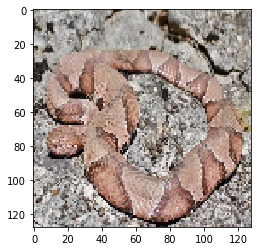

In [5]:
# Print a random Image from the train set
idx = np.random.randint(0,train_set_input.shape[0])
plt.imshow(train_set_input[idx])
print("Classe: {}".format(classes[np.where(Y_train[:,idx]==1)[0][0]]))

In [ ]:
# Flip and rotate the images to augment dataset 

def augment_data_set(input_dataset,input_labels):
    augmented_dataset_image = input_dataset
    augmented_dataset_label = input_labels
    for i in range(input_dataset.shape[0]):
        img = input_dataset[i,:,:,:]
        label = input_labels[i]
        img_flip = tf.image.flip_left_right(img)
        img_rot_1 = tf.contrib.image.rotate(img,np.deg2rad(25))
        img_rot_2 = tf.contrib.image.rotate(img,np.deg2rad(-25))
        img_flip = img_flip.numpy().reshape((1,128,128,3))
        img_rot_1 = img_rot_1.numpy().reshape((1,128,128,3))
        img_rot_2 = img_rot_2.numpy().reshape((1,128,128,3))
        augmented_dataset_image = np.concatenate((augmented_dataset_image,img_flip),axis=0)
        augmented_dataset_label = np.append(augmented_dataset_label,label)
        augmented_dataset_image = np.concatenate((augmented_dataset_image,img_rot_1),axis=0)
        augmented_dataset_label = np.append(augmented_dataset_label,label)
        augmented_dataset_image = np.concatenate((augmented_dataset_image,img_rot_2),axis=0)
        augmented_dataset_label = np.append(augmented_dataset_label,label)
    # SHUFFLE DATASET
    np.random.seed(123)
    idx = np.random.permutation(len(augmented_dataset_image))
    augmented_dataset_image = augmented_dataset_image[idx]
    augmented_dataset_label = augmented_dataset_label[idx]
    return augmented_dataset_image,augmented_dataset_label

In [ ]:
# augmented_dataset_image,augmented_dataset_label = augment_data_set(train_set_input,train_set_label)

In [ ]:
#Y_train = convert_to_one_hot(augmented_dataset_label,3)

# idx = np.random.randint(0,augmented_dataset_image.shape[0])
# plt.imshow(augmented_dataset_image[idx])
# print("Classe: {}".format(classes[np.where(Y_train[:,idx]==1)[0][0]]))

In [6]:
# Reshape Data for FC NN

# Normalize
#X_train = augmented_dataset_image/255
X_train = train_set_input/255
X_test = test_set_input/255
# Reshape
# X_train = X_train.reshape(X_train.shape[0],-1).T
# X_test = X_test.reshape(X_test.shape[0],-1).T

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)



(776, 128, 128, 3)
(3, 776)
(86, 128, 128, 3)
(3, 86)


## ARCHITECTURE of the NN

In [64]:
# simple testing NN
model = Sequential([
    layers.Flatten(input_shape=(128, 128,3)),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(32,activation=tf.nn.relu),
    layers.Dense(16,activation=tf.nn.relu),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(3,activation=tf.nn.softmax)]
)


In [65]:
adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy',keras.metrics.mse])

In [66]:
history = model.fit(X_train, Y_train.T, epochs=55,batch_size=16)

Epoch 1/55
776/776 [==============================] - 0s 452us/sample - loss: 1.0964 - acc: 0.3982 - mean_squared_error: 0.2211
Epoch 2/55
776/776 [==============================] - 0s 264us/sample - loss: 1.0362 - acc: 0.4497 - mean_squared_error: 0.2086
Epoch 3/55
776/776 [==============================] - 0s 279us/sample - loss: 0.9873 - acc: 0.5271 - mean_squared_error: 0.1971
Epoch 4/55
776/776 [==============================] - 0s 279us/sample - loss: 0.9846 - acc: 0.5193 - mean_squared_error: 0.1966
Epoch 5/55
776/776 [==============================] - 0s 283us/sample - loss: 0.9015 - acc: 0.5580 - mean_squared_error: 0.1793
Epoch 6/55
776/776 [==============================] - 0s 280us/sample - loss: 0.9395 - acc: 0.5451 - mean_squared_error: 0.1869
Epoch 7/55
776/776 [==============================] - 0s 295us/sample - loss: 0.8865 - acc: 0.5760 - mean_squared_error: 0.1765
Epoch 8/55
776/776 [==============================] - 0s 288us/sample - loss: 0.8354 - acc: 0.6302 - mea

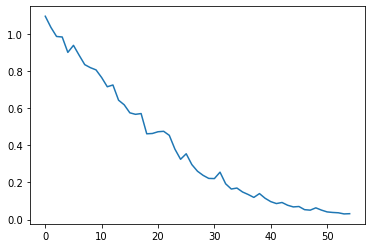

In [67]:
plt.plot(history.history['loss'])

In [68]:
test_loss, test_acc, test_mse = model.evaluate(X_test, Y_test.T)

print('Test accuracy:', test_acc)
print('Test MSE:', test_mse)

86/86 [==============================] - 0s 583us/sample - loss: 1.4327 - acc: 0.6047 - mean_squared_error: 0.2247
Test accuracy: 0.60465115
Test MSE: 0.22472826


In [69]:
predictions = model.predict(X_test)

Predicted Classe: watersnake
Confidence: 70.67%
Correct classe: watersnake


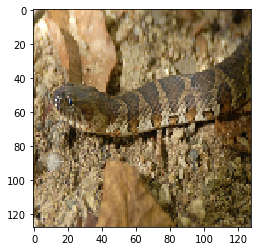

In [80]:
idx = np.random.randint(0,test_set_input.shape[0])
plt.imshow(test_set_input[idx])
print("Predicted Classe: {}".format(classes[np.argmax(predictions[idx,:])]))
print("Confidence: {0:.2f}%".format(100*predictions[idx,:].max()))
print("Correct classe: {}".format(classes[np.where(Y_test[:,idx]==1)[0][0]]))

In [72]:
test_path = "dataset/test_data/"
directory = os.listdir(test_path)
i = 0
images_test = np.empty([len(directory),128,128,3],dtype='uint8')
images_classes = []
for filename in directory:
    img = Image.open(test_path+filename)
    images_classes.append(filename.split('.')[0].split("_")[0])
    img = Image.Image.resize(img,(128,128)).convert("RGB")
    images_test[i] = np.array(img)
    i+=1

In [46]:
ptest = model.predict(images_test)

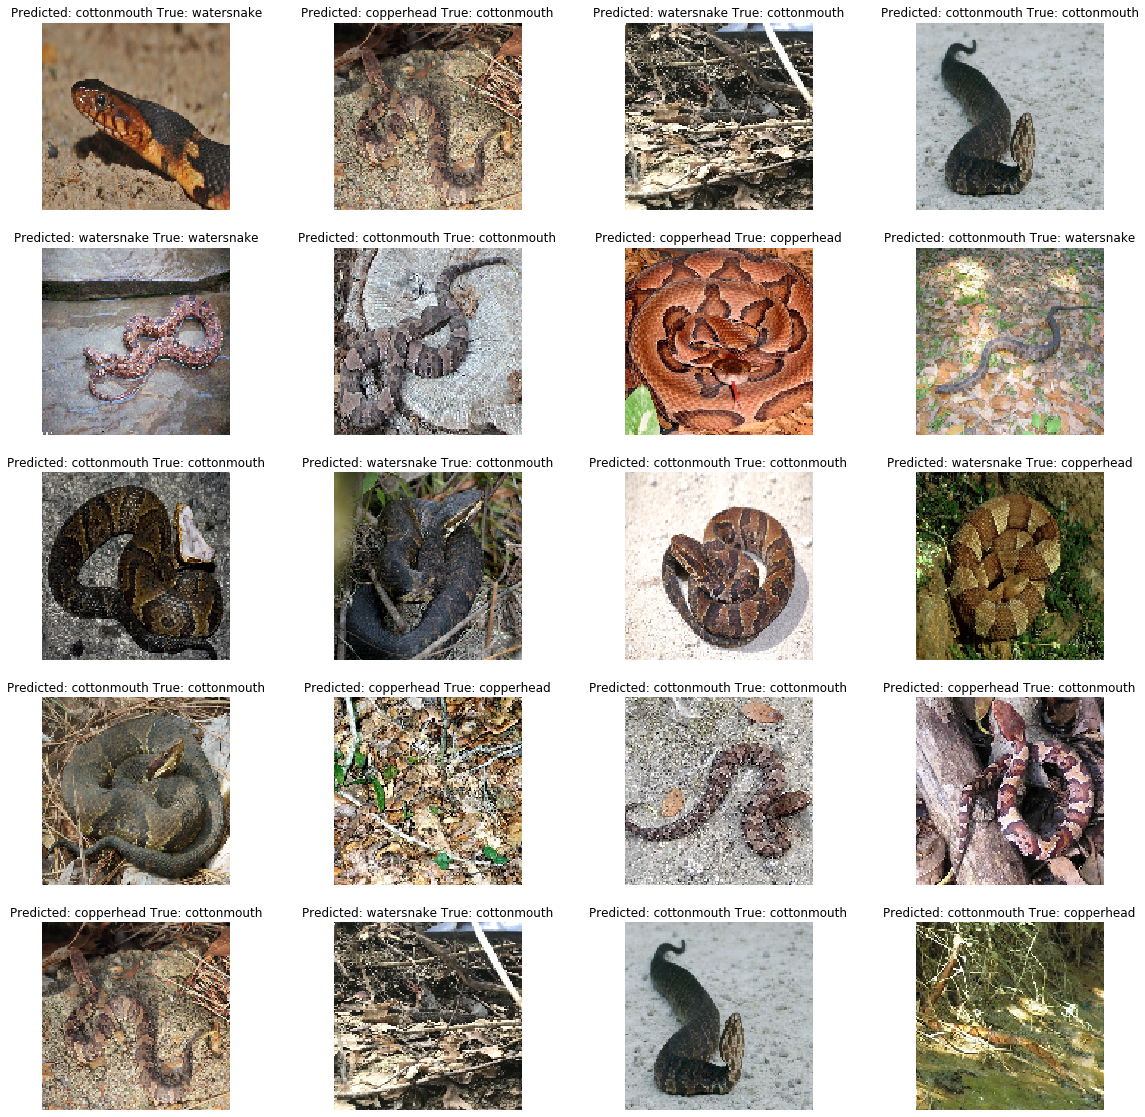

In [47]:
f,axes = plt.subplots(5,4,figsize=(20,20))
for i in range(5):
    for j in range(4):
        image = images_test[i+4*j,:,:,:]
        text = "Predicted: "+classes[np.argmax(ptest[i+4*j,:])] + " True: " + images_classes[i+4*j]
        axes[i][j].set_title(text)
        axes[i][j].imshow(image)
        axes[i][j].axis("off")

In [81]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                3145792   
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_33 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 195       
Total params: 3,149,683
Trainable params: 3,149,683
Non-trainable params: 0
____________________________________________